<a href="https://colab.research.google.com/github/MatthewC00273575/Data-Science/blob/master/LinearRegressionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


<ipython-input-53-33c0c1697aa4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<ipython-input-2-912786f26090>:1: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/vehicles.csv')


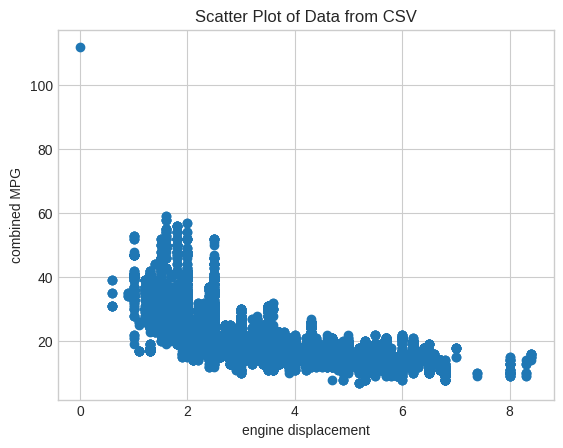

In [ ]:
data = pd.read_csv('/content/vehicles.csv')
x = data['displ']
y = data['comb08']
plt.scatter(x, y)
plt.ylabel('combined MPG')
plt.xlabel('engine displacement')
plt.title('Scatter Plot of Data from CSV')
plt.show()

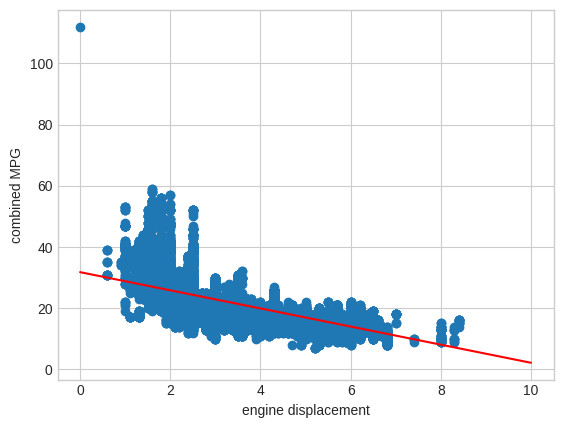

In [ ]:
# Ensuring x and y are NumPy arrays
x = np.array(x)
y = np.array(y)

# Impute missing values (using the mean strategy)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x.reshape(-1, 1))  # Reshape to 2D array
y_imputed = imputer.fit_transform(y.reshape(-1, 1))  # Reshape to 2D array

# Fit the model
model = LinearRegression(fit_intercept=True)
model.fit(x_imputed, y_imputed)

# Generate predictions
xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit.reshape(-1, 1))

# Plot the results
plt.scatter(x, y)
plt.ylabel('combined MPG')
plt.xlabel('engine displacement')
plt.plot(xfit, yfit, color='red')
plt.show()

added
x = np.array(x)
y = np.array(y)

to fix-> ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [-2.96302758]
Model intercept: [31.76932531]


In [ ]:
new_data = np.array([[4.0], [6.0], [8.0]])  # Example engine displacements
predictions = model.predict(new_data)
print(predictions)  # Outputs the predicted fuel efficiency

[[19.91721499]
 [13.99115982]
 [ 8.06510466]]


In [54]:
vehicles_df = pd.read_csv('/content/vehicles.csv')


# Select relevant features and target variable
features = ['displ', 'cylinders', 'drive', 'fuelType']  # Predictor variables
target = 'comb08'  # Target variable (combined MPG)

# Drop rows with missing values in the selected features or target
vehicles_df = vehicles_df[features + [target]].dropna()

# Convert categorical variables (drive, fuelType) to numerical values using one-hot encoding
vehicles_df = pd.get_dummies(vehicles_df, columns=['drive', 'fuelType'], drop_first=True)

# Split the dataset into features (X) and target (y)
X = vehicles_df.drop(columns=[target])
y = vehicles_df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor (CART in scikit-learn)
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example new car's attributes
new_car = {
    'displ': 1,       # Engine displacement
    'cylinders': 6,     # Number of cylinders
    'drive_FWD': 0,     # Front-wheel drive (set to 1 for FWD, 0 otherwise)
    'fuelType_Gasoline': 1  # Gasoline (set to 1 for gasoline, 0 otherwise)
}

# Convert the new car's attributes to a DataFrame with the same structure as the training data
new_car_df = pd.DataFrame([new_car])

# Ensure the new car DataFrame has the same columns as the training set
new_car_df = new_car_df.reindex(columns=X.columns, fill_value=0)

# Predict the fuel efficiency for the new car
predicted_mpg = model.predict(new_car_df)

print(f"Predicted Combined MPG for the new car: {predicted_mpg[0]}")

Mean Squared Error: 7.771645185277622
Predicted Combined MPG for the new car: 36.0


<ipython-input-54-a61c94cc86ee>:1: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd.read_csv('/content/vehicles.csv')


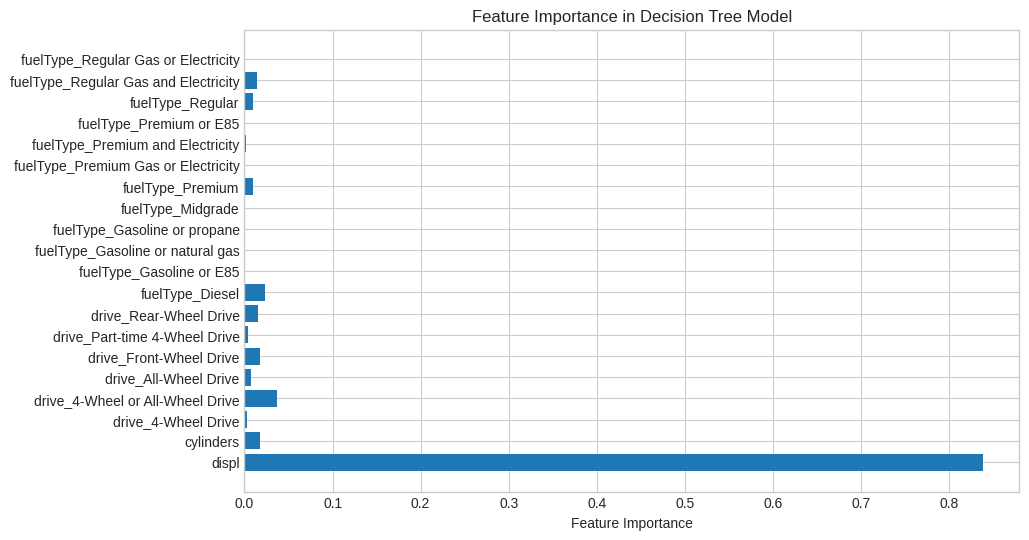

In [55]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Model")
plt.show()

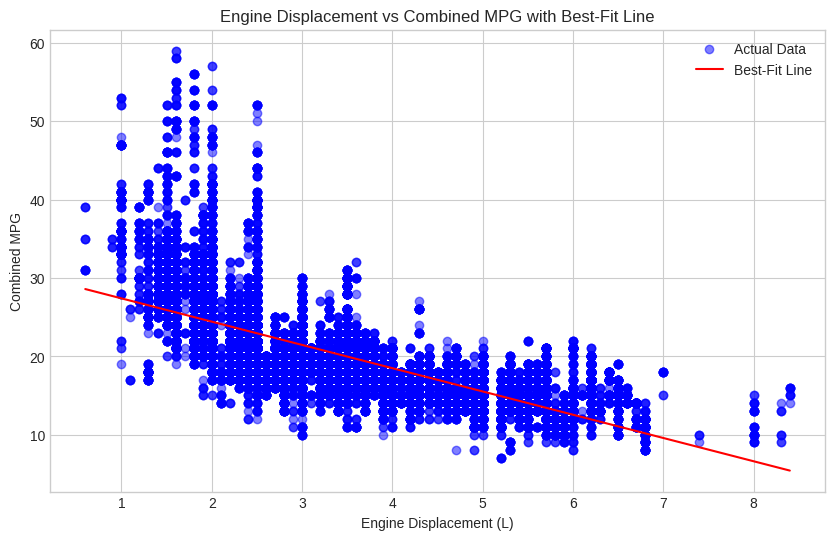

In [56]:
# Extracting the features and target for linear regression
X = vehicles_df['displ'].values.reshape(-1, 1)  # Engine displacement (reshape for sklearn)
y = vehicles_df['comb08'].values  # Combined MPG

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the MPG for the given engine displacement values
xfit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate 100 points for a smooth line
yfit = model.predict(xfit)

# Plotting the scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(xfit, yfit, color='red', label='Best-Fit Line')

# Add labels and title
plt.xlabel("Engine Displacement (L)")
plt.ylabel("Combined MPG")
plt.title("Engine Displacement vs Combined MPG with Best-Fit Line")

# Add a legend
plt.legend()

# Show the plot
plt.show()